In [1]:
## Matteo Peluso Febbraio 2019
# PhD Student: Methods and Model for Molecular Sciences
# Scuola Normale Superiore, Pisa
# email: matteo.peluso@sns.it

import os
import time
import seaborn
seaborn.set(style='whitegrid')
seaborn.set_context('paper')

# Path to get to the python modules
path_data = "/home/matteopeluso/Scrivania/jupyter-lab/lrr-de/silver/func"
os.chdir(path_data)


from parse_input     import *
from distances       import *
from multi_objective import *
from normal_solver   import *
from testing         import *


In [2]:
# --------------------------- User ------------------------------#
# Set of input parameters for the lrr-de procedure

input_params = {}
flag_files   = {}
training     = {}

input_params['n_conf']        = 239  # Number of total configurations
input_params['n_test']        = 39   # Dimension Test Set
input_params['n_train']       = 200  # Dimension Training Set
input_params['len_vs']        = 0.09 # Length of the Virtual Site
input_params['n_vs']          = 2    # Number of Virtual Sites

input_params['index_ion']     = 1    # Index of the ion in the coordinate file  
input_params['N_atom']        = [385, 97] # Number of atom per system 
input_params['N_water']       = [128, 32] # Number of water molecules per system

input_params['old_params']    = [1, 0.278,0.4]   # Old FF Parameters for testing Q, sigma, eps 

input_params['n_functions']   = 3  # 0 --> Parametri Ag: c6,c12   VS: q
                                   # 1 --> Parametri Ag: c6,c12   VS: q, c12
                                   # 2 --> Parametri Ag: c6,c12   VS: q, c6,c12
                                   # 3 --> Parametri Ag: q,c6,c12 VS: q,c6,c12
                                   # 4 --> Parametri Ag: q,c6,c12 VS: q 
                                   # 5 --> Parametri Ag: q,c6,c12 VS: q, c12
                
input_params['q_value']       = 0.8 # if nfunctions = 0,1,2 inserire valore della carica
input_params['file_dir']      = "/home/matteopeluso/Scrivania/jupyter-lab/lrr-de/silver/out_cn2_extended" # Directory of the input files
input_params['outdir']        = "/home/matteopeluso/Scrivania/jupyter-lab/lrr-de/silver/out_cn2_extended" # Directory for the output files
input_params['counterpoise']  = True # If the Counterpoise correction has been applied
input_params['borders']       = np.matrix([10e-15, 10e-1]) # Border for the search of the hyperparameter

# Flag for the files to be read
flag_files['topology']        = True
flag_files['energy']          = True
flag_files['force']           = True  
flag_files['coordinate']      = True 



In [3]:
# ------------------------ Training Set---------------------------------#

print("----------------------------------------------------------------")
print("Generating Training and Test Set")

## Parsing + Distance matrices
t0 = time.time()
_parser = parser(input_params, flag_files)
_parser.eval_distances()
input_params = _parser.input_params


# Training set
energy_ts = input_setup(input_params, flag="energy", weight=[1,1])
force_ts  = input_setup(input_params, flag="force",  weight=[30,30])

training['energy_ts'] = energy_ts 
training['force_ts']  = force_ts
data_set  = training_set(training)

data_set.model_descriptor()
t1 = time.time()
total = t1-t0
print("Time employed to build the Training and Test Set {} s".format(np.round(total,2)))
print("----------------------------------------------------------------")


----------------------------------------------------------------
Generating Training and Test Set
Time employed to build the Training and Test Set 4.76 s
----------------------------------------------------------------


----------------------------------------------------------------
Evaluating parameters ---> LRRDE
----------------------------------------------------------------
Scaled MAE 111.65, loocv 4892.98
LOOCV error 4892.98, lambda [[1.45139576e-15]], Numero Iterazioni 251, Parametri :
----------------------------------------------------------------
Resulting Parameters
----------------------------------------------------------------
Atom: q  1.415915 c12  0.000060 c6  -0.137399
VS1: q_vs1   -0.087001 c12_vs1   0.000000 c6_vs1 0.003444
VS2: q_vs2   -0.060761 c12_vs2   0.000000 c6_vs2   0.001554
----------------------------------------------------------------
Statistics:
----------------------------------------------------------------
R2 score:  lrr-de 0.859
MSE score: lrr-de 262352.26
MAE score: lrr-de 413.55
R2 score  old params: -0.078
MSE score old params: 461476.95
MAE score old params: 525.88
----------------------------------------------------------------


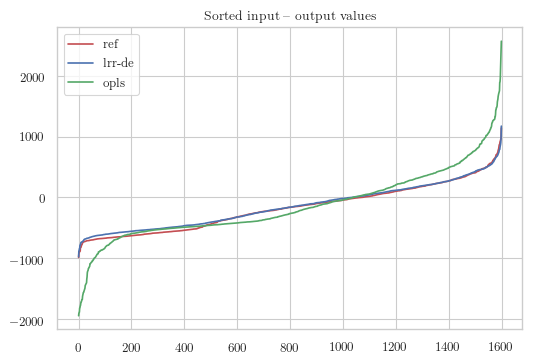

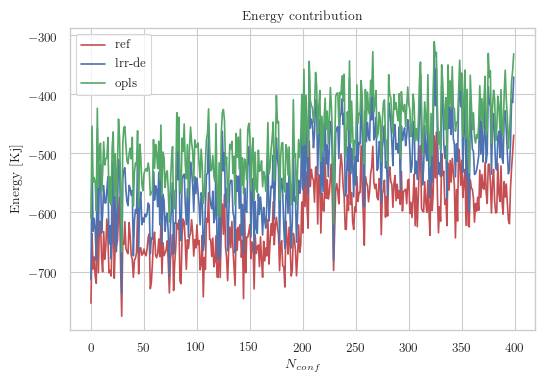

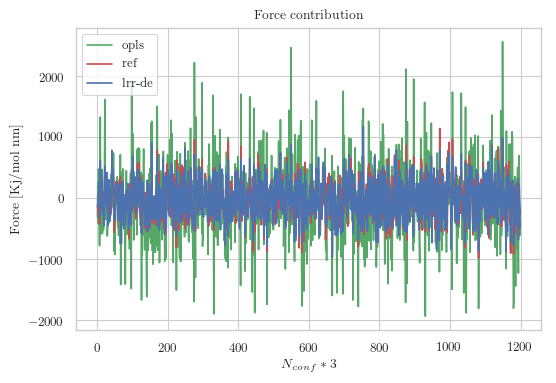

In [4]:
# ------------------------ Fitting -------------------------------------#
print("----------------------------------------------------------------")
t0 = time.time()
print("Evaluating parameters ---> LRRDE")
print("----------------------------------------------------------------")
lrrde = eval_lrrde(data_set)
lrrde.eval_de()


Time employed for the fitting 158.32679414749146 s
----------------------------------------------------------------
Prediction
----------------------------------------------------------------
SET: energy, # of water molecules 128
MSE (lrr-de) = 13339.629337222814
MAE (opls) = 347.4917715109093
MAE (lrr-de) = 87.21925229157347
-------
SET: energy, # of water molecules 32
MSE (lrr-de) = 11615.35849800013
MAE (opls) = 336.7863102030593
MAE (lrr-de) = 68.96160010746381
-------
SET: force, # of water molecules 128
MSE (lrr-de) = 458332.17610483547
MAE (opls) = 564.9992088283504
MAE (lrr-de) = 218.35637031641872
-------
SET: force, # of water molecules 32
MSE (lrr-de) = 514995.9852854986
MAE (opls) = 620.9854602307053
MAE (lrr-de) = 181.37928973787442
-------


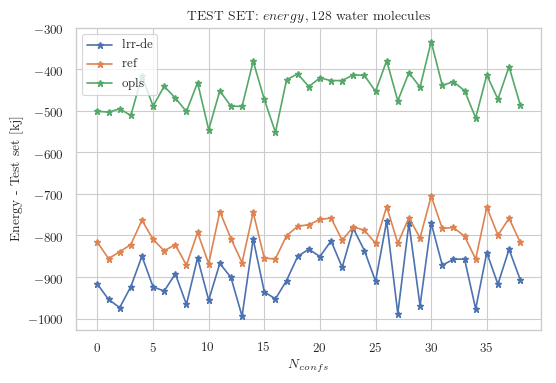

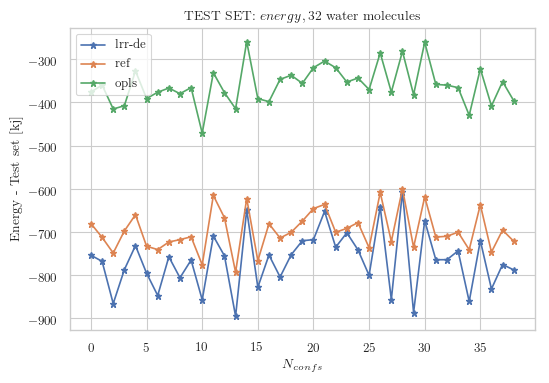

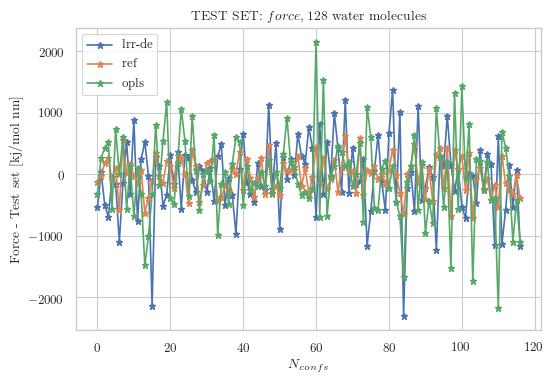

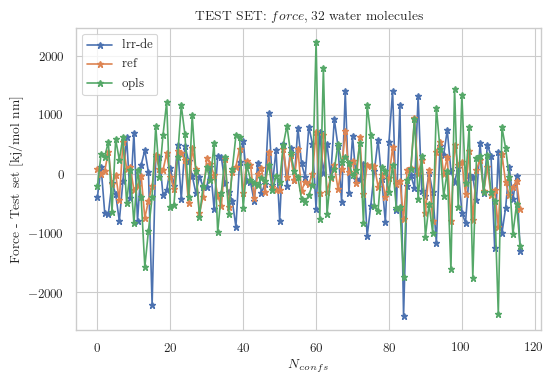

In [5]:
# ------------------------ Testing -------------------------------------#
t1 = time.time()
total = t1-t0
print("Time employed for the fitting {} s".format(total))
#
print("----------------------------------------------------------------")
print("Prediction")
print("----------------------------------------------------------------")
#
testing_data(data_set = data_set, params = lrrde.params, plot = 'y')